In [1]:
import sys
sys.path.append("../src")
from acoupipe_extensions import VariableArrayConfig, random_positions, VogelHansen

from acoupipe.datasets.synthetic import DatasetSynthetic

import numpy as np
import matplotlib.pyplot as plt

/home/zaid/.conda/envs/thesis/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


  0%|          | 0/5 [00:00<?, ?it/s]

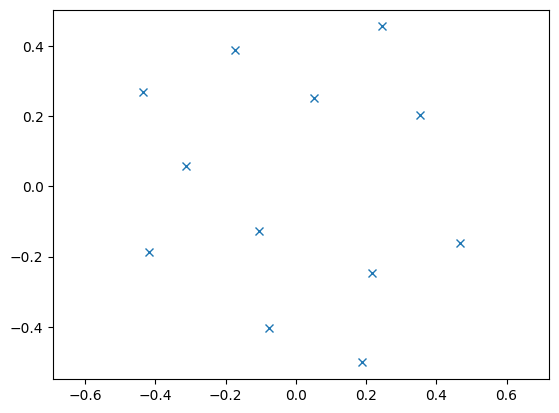

 20%|██        | 1/5 [00:00<00:00,  9.60it/s]

torch.Size([3, 12])


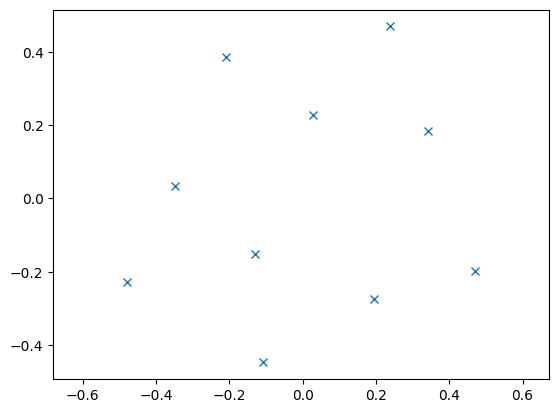

 40%|████      | 2/5 [00:00<00:00,  9.45it/s]

torch.Size([3, 10])


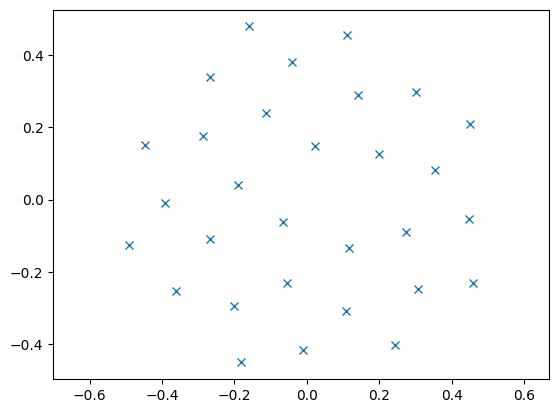

 60%|██████    | 3/5 [00:00<00:00,  9.55it/s]

torch.Size([3, 30])


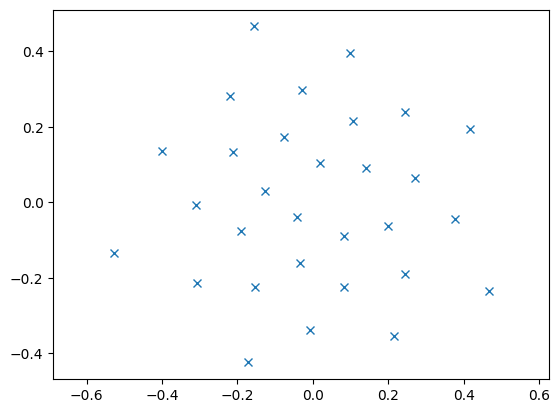

 80%|████████  | 4/5 [00:00<00:00,  9.42it/s]

torch.Size([3, 30])


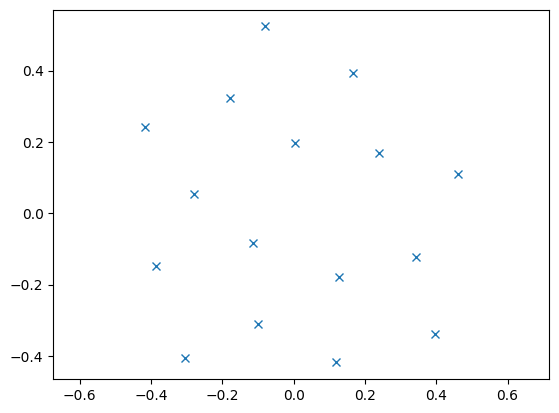

100%|██████████| 5/5 [00:00<00:00,  9.18it/s]

torch.Size([3, 16])


In [4]:
import torch


test_generator = np.random.default_rng(seed=20006)
config = VariableArrayConfig(mpos_fn=VogelHansen, mode="analytic", mic_sig_noise=False, generator=test_generator, min_nsources=1, max_nsources=4, min_num_mics=5, max_num_mics=32)

dataset = DatasetSynthetic(config=config)

dataset_generator = dataset.generate(
    #features=["loc","source_strength_analytic"], # choose the features to extract
    features = ["cartesian_coordinates"],
    f=[1000], # choose the frequencies to extract
    split='training', # choose the split of the dataset
    size=5, # choose the size of the dataset
    )

for data in dataset_generator:
        coords = torch.tensor(data["cartesian_coordinates"])
        plt.plot(coords[0,:], coords[1,:], "x")
        plt.axis('equal')
        plt.show()

        print(coords.shape)

        #csm = torch.tensor(data["csm"])
        #print(csm)
        #print(data["idx"], "\n")
        #array = dataset.config.micgeom_sampler.target
        #coords = array.pos_total
        #print(array.center)
        #print(array.aperture)
        #plt.scatter(coords[0], coords[1])
        #plt.axis('equal')
        #plt.show()